In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,NaN,72.99,NaN,NaN,NaN,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,NaN,NaN,73.61,0.00,NaN,NaN,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	16
float64		column 2	0
float64		column 3	25
float64		column 4	30
float64		column 5	21
float64		column 6	31
float64		column 7	30
float64		column 8	31
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,198.000000,214.000000,189.000000,184.000000,193.000000,183.000000,184.000000,183.000000,214.000000
mean,1.518389,13.407850,2.688095,1.432283,72.633990,0.498306,8.993315,0.155410,0.057009
std,0.003031,0.816604,1.447458,0.487392,0.770545,0.693160,1.466565,0.455168,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516550,12.907500,2.090000,1.190000,72.260000,0.120000,8.262500,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.350000,72.750000,0.550000,8.615000,0.000000,0.000000
75%,1.519175,13.825000,3.600000,1.622500,73.080000,0.600000,9.200000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

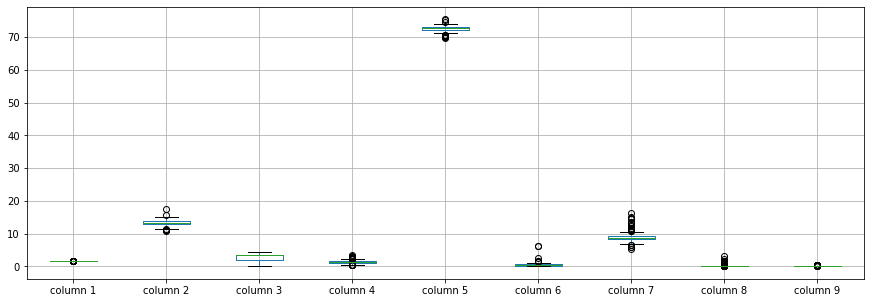

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518389
column 2    13.407850
column 3     2.688095
column 4     1.432283
column 5    72.633990
column 6     0.498306
column 7     8.993315
column 8     0.155410
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.228405,-0.114013,-0.395060,-0.539252,-0.295924,0.829800,-0.006273,0.177041
column 2,-0.228405,1.000000,-0.274032,0.134098,-0.012348,-0.269926,-0.300221,0.257884,-0.241346
column 3,-0.114013,-0.274032,1.000000,-0.474095,-0.225311,0.077697,-0.445674,-0.474137,0.074783
column 4,-0.395060,0.134098,-0.474095,1.000000,0.049612,0.273377,-0.227880,0.551232,-0.039761
column 5,-0.539252,-0.012348,-0.225311,0.049612,1.000000,-0.224310,-0.252648,-0.129710,-0.130174
column 6,-0.295924,-0.269926,0.077697,0.273377,-0.224310,1.000000,-0.305935,-0.056957,-0.006379
column 7,0.829800,-0.300221,-0.445674,-0.227880,-0.252648,-0.305935,1.000000,-0.076688,0.136016
column 8,-0.006273,0.257884,-0.474137,0.551232,-0.129710,-0.056957,-0.076688,1.000000,-0.021871
column 9,0.177041,-0.241346,0.074783,-0.039761,-0.130174,-0.006379,0.136016,-0.021871,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+54,9+54+54,9+54+54+54,9+54+54+54+54,9+54+54+54+54+54,9+54+54+54+54+54+54,9+54+54+54+54+54,9+54+54+54+54,9+54+54+54,9+54+54,9+54,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 93.00440040001503
Epoch: 1 , loss: 93.3619126539964
Epoch: 2 , loss: 92.91252899169922
Epoch: 3 , loss: 93.70847966120793
Epoch: 4 , loss: 92.96607384314903
Epoch: 5 , loss: 93.29438840425931
Epoch: 6 , loss: 93.20452528733473
Epoch: 7 , loss: 92.85782329852765
Epoch: 8 , loss: 93.279905465933
Epoch: 9 , loss: 93.26051624004657
Epoch: 10 , loss: 93.187621483436
Epoch: 11 , loss: 92.78226940448468
Epoch: 12 , loss: 92.71514129638672
Epoch: 13 , loss: 93.05352137638972
Epoch: 14 , loss: 92.55985494760367
Epoch: 15 , loss: 92.51505103478065
Epoch: 16 , loss: 92.37628467266376
Epoch: 17 , loss: 91.35399979811449
Epoch: 18 , loss: 91.38717944805438
Epoch: 19 , loss: 90.48411442683293
Epoch: 20 , loss: 90.80069028414212
Epoch: 21 , loss: 89.76556924673227
Epoch: 22 , loss: 89.47480304424579
Epoch: 23 , loss: 88.69935960036058
Epoch: 24 , loss: 88.38280839186449
Epoch: 25 , loss: 87.48502232478215
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,-1.037313,0.0,-0.167197,-4.793318,0.028697,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
210,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
211,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
212,0.0,0.0,0.371825,-1.683528,0.0,0.000000,-7.647009,-1.520964,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(286.28868028189305, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.2625451517701052

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     1.339836
column 5    72.220000
column 6     0.527305
column 7     9.076205
column 8     0.135059
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.490000,1.100000,71.78,0.060000,8.750000,0.000000,0.0
1,1.51761,13.89,3.600000,1.360000,72.73,0.480000,7.830000,0.000000,0.0
2,1.51618,13.53,3.550000,0.502687,72.99,0.222803,2.986682,0.028697,0.0
3,1.51766,13.21,3.690000,1.290000,72.61,0.570000,8.220000,0.000000,0.0
4,1.51742,13.27,3.620000,1.240000,73.08,0.550000,8.070000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.880000,72.61,0.080000,9.180000,1.060000,0.0
210,1.51685,14.92,0.000000,1.990000,73.06,0.000000,8.400000,1.590000,0.0
211,1.52065,14.36,0.000000,2.020000,73.42,0.000000,8.440000,1.640000,0.0
212,1.51651,14.38,0.371825,0.256472,73.61,0.000000,0.832991,0.049036,0.0


In [20]:
imputations[-1].to_excel("Glass_AW_10(imp).xlsx", index=False, header=False)